In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats

In [2]:
k=pd.read_excel("p1-customers.xlsx")
df=k[['Avg_Num_Products_Purchased','Customer_Segment','Avg_Sale_Amount']]


In [3]:
df=pd.get_dummies(data=df,prefix=['Customer_Segment'],drop_first=True)
X=df.drop(['Avg_Sale_Amount'],axis=1)
y=df['Avg_Sale_Amount']

In [4]:
model = sm.OLS(y, X).fit()
model.summary()
#To check the Model's performance

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                              5832.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):                        0.00
Time:                        14:41:34   Log-Likelihood:                         -15415.
No. Observations:                2375   AIC:                                  3.084e+04
Df Residuals:                    2371   BIC:                                  3.086e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
=================================================================================================================
                                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
Avg_Num_Products_Purchased                      102.2377      1.028     99.415      0.000     100.221     104.254
Customer_Segment_Loyalty Club Only               26.5817      7.603      3.496      0.000      11.673      41.490
Customer_Segment_Loyalty Club and Credit Card   327.9296     13.696     23.944      0.000     301.073     354.786
Customer_Segment_Store Mailing List               5.7581      5.030      1.145      0.252      -4.106      15.622
==============================================================================
Omnibus:                      258.834   Durbin-Watson:                   1.776
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2043.923
Skew:                          -0.167   Prob(JB):                         0.00
Kurtosis:                       7.532   Cond. No.                         18.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
df_mail=pd.read_excel("p1-mailinglist.xlsx")
df_mail.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Store_Number,Avg_Num_Products_Purchased,#_Years_as_Customer,Score_No,Score_Yes
0,A Giametti,Loyalty Club Only,2213,5326 S Lisbon Way,Centennial,CO,80015,105,3,0.2,0.694964,0.305036
1,Abby Pierson,Loyalty Club and Credit Card,2785,4344 W Roanoke Pl,Denver,CO,80236,101,6,0.6,0.527275,0.472725
2,Adele Hallman,Loyalty Club Only,2931,5219 S Delaware St,Englewood,CO,80110,101,7,0.9,0.421118,0.578882
3,Alejandra Baird,Loyalty Club Only,2231,2301 Lawrence St,Denver,CO,80205,103,2,0.6,0.694862,0.305138
4,Alice Dewitt,Loyalty Club Only,2530,5549 S Hannibal Way,Centennial,CO,80015,104,4,0.5,0.612294,0.387706


In [6]:
df_mail=df_mail[['Avg_Num_Products_Purchased','Customer_Segment']]
X_new=pd.get_dummies(data=df_mail,prefix=['Customer_Segment'],drop_first=True)

In [7]:
prediction=model.predict(X_new)
prediction[0:6]

0    333.294813
1    941.355858
2    742.245664
3    231.057100
4    435.532525
5    715.663989
dtype: float64

In [8]:
355.036364*0.305036

108.29887232910399

In [9]:
new_df=pd.read_excel("p1-mailinglist.xlsx")
data=pd.DataFrame()
data['Name']=new_df['Name']
data['Updated Revenue']=prediction
data['Score_Yes']=new_df['Score_Yes']
data['Score_No']=new_df['Score_No']
data['Revenue Yes']=data['Score_Yes']*data['Updated Revenue']
data['Revenue Yes_New']=data['Revenue Yes']*0.5
data['Profit']=data['Revenue Yes_New']-6.5
data.head()

,Name,Updated Revenue,Score_Yes,Score_No,Revenue Yes,Revenue Yes_New,Profit
0,A Giametti,333.294813,0.305036,0.694964,101.666852,50.833426,44.333426
1,Abby Pierson,941.355858,0.472725,0.527275,445.002012,222.501006,216.001006
2,Adele Hallman,742.245664,0.578882,0.421118,429.672543,214.836271,208.336271
3,Alejandra Baird,231.057100,0.305138,0.694862,70.504258,35.252129,28.752129
4,Alice Dewitt,435.532525,0.387706,0.612294,168.858510,84.429255,77.929255


In [10]:
print ("The total profit is: {}".format(data['Profit'].sum()))

The total profit is: 20852.08933006481


In [11]:
y.head()

0    227.90
1     55.00
2    212.57
3    195.31
4    110.55
Name: Avg_Sale_Amount, dtype: float64

In [12]:
w=X_new.values
w[0:5]

array([[3, 1, 0, 0],
       [6, 0, 1, 0],
       [7, 1, 0, 0],
       [2, 1, 0, 0],
       [4, 1, 0, 0]], dtype=int64)

In [13]:
X.head()

,Avg_Num_Products_Purchased,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List
0,1,0,0,1
1,1,0,0,1
2,1,0,0,1
3,1,0,0,1
4,1,0,0,1


In [64]:
X_new.head()

,Avg_Num_Products_Purchased,Customer_Segment_Loyalty Club Only,Customer_Segment_Loyalty Club and Credit Card,Customer_Segment_Store Mailing List
0,3,1,0,0
1,6,0,1,0
2,7,1,0,0
3,2,1,0,0
4,4,1,0,0


In [14]:
k.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2


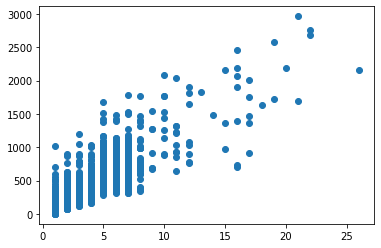

In [17]:
plt.scatter(x=k['Avg_Num_Products_Purchased'],y=k['Avg_Sale_Amount'])

In [25]:
k.head()

,Name,Customer_Segment,Customer_ID,Address,City,State,ZIP,Avg_Sale_Amount,Store_Number,Responded_to_Last_Catalog,Avg_Num_Products_Purchased,#_Years_as_Customer
0,Pamela Wright,Store Mailing List,2,376 S Jasmine St,Denver,CO,80224,227.90,100,No,1,6
1,Danell Valdez,Store Mailing List,7,12066 E Lake Cir,Greenwood Village,CO,80111,55.00,105,Yes,1,6
2,Jessica Rinehart,Store Mailing List,8,7225 S Gaylord St,Centennial,CO,80122,212.57,101,No,1,3
3,Nancy Clark,Store Mailing List,9,4497 Cornish Way,Denver,CO,80239,195.31,105,Yes,1,6
4,Andrea Brun,Store Mailing List,10,2316 E 5th Ave,Denver,CO,80206,110.55,100,Yes,1,2


In [30]:
a=k[['Customer_ID','ZIP','Store_Number','Avg_Num_Products_Purchased','#_Years_as_Customer']]
b=k[['Avg_Sale_Amount']]
model2=sm.OLS(b,a).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Avg_Sale_Amount   R-squared (uncentered):                   0.888
Model:                            OLS   Adj. R-squared (uncentered):              0.887
Method:                 Least Squares   F-statistic:                              3748.
Date:                Sun, 18 Apr 2021   Prob (F-statistic):                        0.00
Time:                        15:10:16   Log-Likelihood:                         -15648.
No. Observations:                2375   AIC:                                  3.131e+04
Df Residuals:                    2370   BIC:                                  3.133e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Customer_ID                   -0.0047      0.004     -1.237      0.216      -0.012       0.003
ZIP                            0.0005      0.002      0.304      0.761      -0.003       0.004
Store_Number                   0.1507      1.263      0.119      0.905      -2.326       2.628
Avg_Num_Products_Purchased   106.4176      1.323     80.438      0.000     103.823     109.012
#_Years_as_Customer           -1.0550      1.566     -0.674      0.500      -4.125       2.015
==============================================================================
Omnibus:                      581.693   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3666.291
Skew:                           1.002   Prob(JB):                         0.00
Kurtosis:                       8.747   Cond. No.                     3.48e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.48e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""